In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import cartopy.io.shapereader as shpreader
from matplotlib import colorbar, colors


In [28]:
t_data = xr.open_dataset('./dados/junho2022.nc', engine="netcdf4")


In [29]:
t_data.time[21]

<xarray.DataArray 'time' ()>
array('2022-06-21T21:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-06-21T21:00:00
Attributes:
    long_name:  time

In [30]:
n = 21
local ="Timbó"

gelo = t_data.deg0l[n,:] #data e hora ver no xarray acima
cape = t_data.cape[n,:]
cine = t_data.cin[n,:]
aguapreciptavel = t_data.tp[n,:]*10000
vertempint = t_data['p54.162'][n,:]
venton = t_data.v100[n,:]
ventow = t_data.u100[n,:]
ventinhon =  t_data.v10[n,:]
ventinhow =  t_data.u10[n,:]
vento10 = np.sqrt(ventinhow**2+ventinhon**2)
vento100 = np.sqrt(ventow**2+venton**2)

lat = t_data.latitude
lon = t_data.longitude
#2021-02-14T18:00:00.000000000'

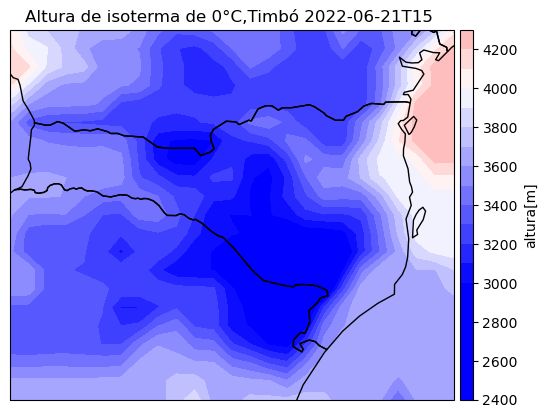

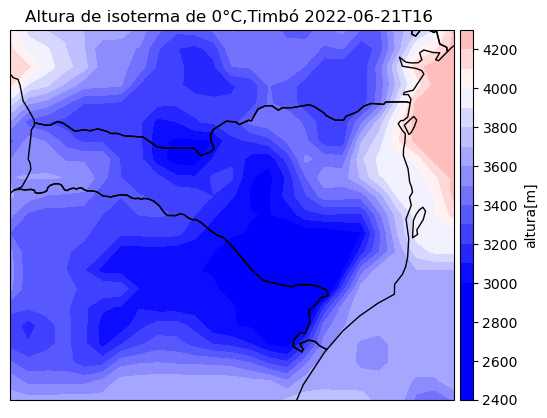

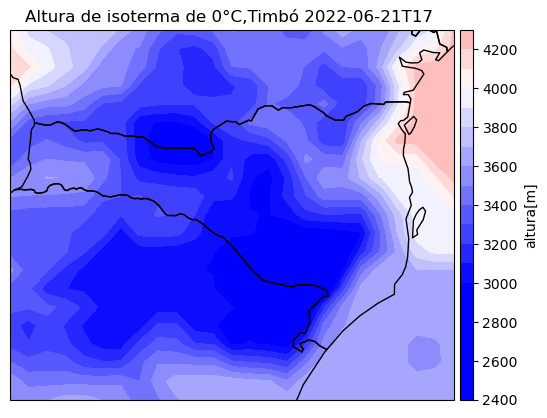

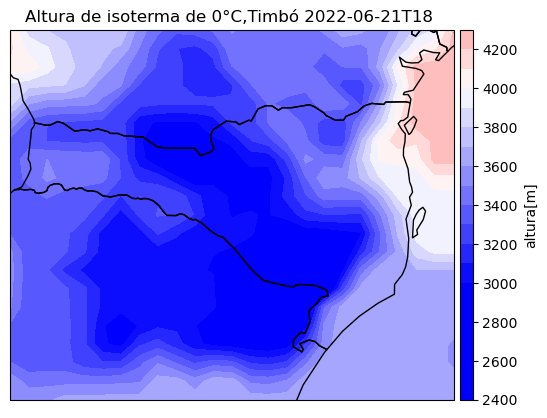

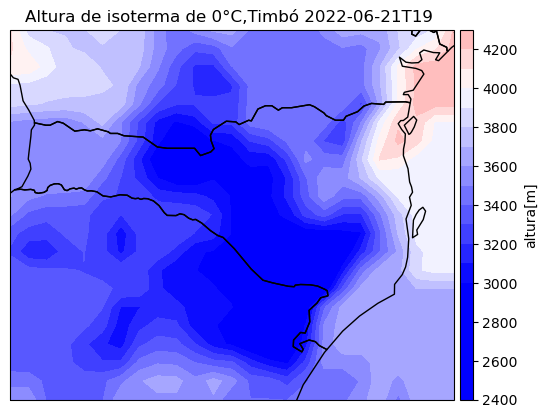

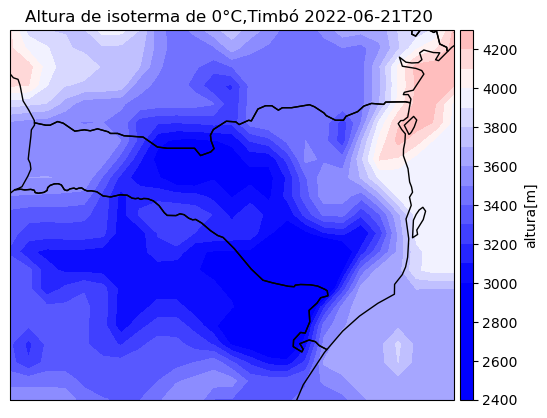

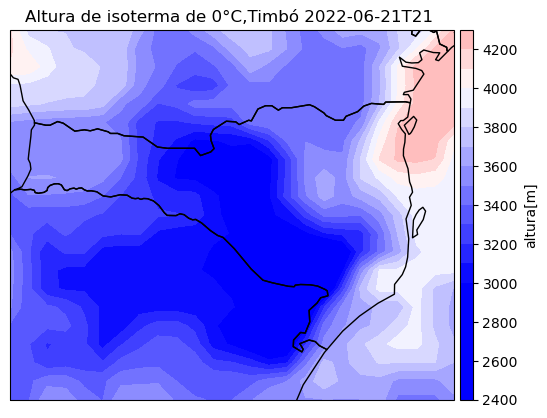

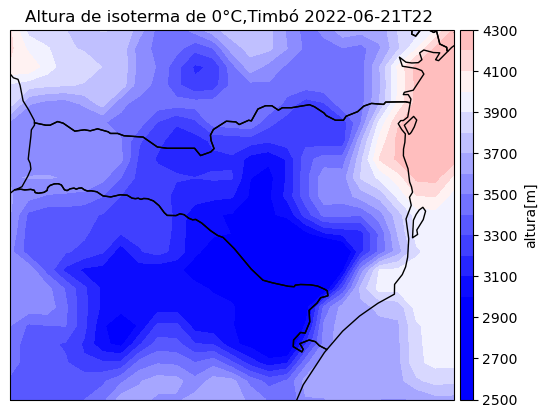

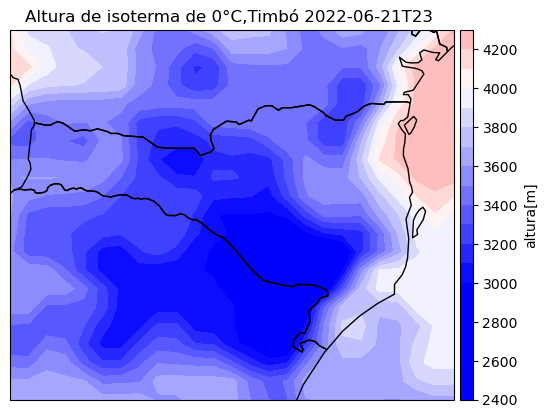

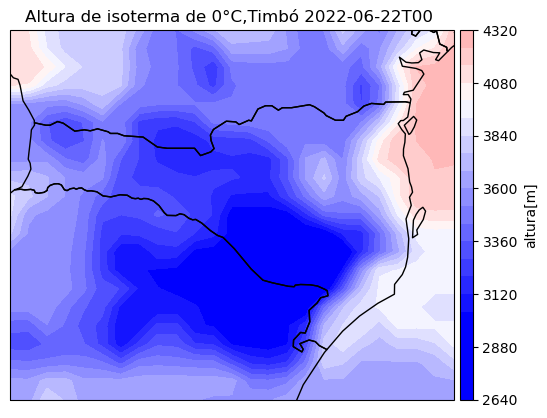

In [31]:
# Setup the figure

d = n-6
while d < n+4:
    gelo = t_data.deg0l[d,:]
    hora = t_data.time[d].values
    hora = str(hora)
    hora = hora[0:13]

    fig = plt.figure()
    ax = plt.subplot(projection=ccrs.PlateCarree())
    plt.title(f"Altura de isoterma de 0°C,{local} {hora} ")

    tplot = ax.contourf(lon, lat, gelo, cmap='bwr', levels=20, vmin=3000, vmax=5000)

    posn = ax.get_position()
    cbar_ax = fig.add_axes([posn.x0 + posn.width + 0.01, posn.y0, 0.02, posn.height])

    plt.colorbar(tplot, cax=cbar_ax, label='altura[m]')
    ax.add_feature(cfeature.STATES.with_scale('50m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\altura{d}.png', bbox_inches='tight')
    d+=1 
#ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
#ax.set_extent([-54,-48,-30,-25.5],crs=ccrs.PlateCarree())
#plt.scatter(x=-49.5742,y=-27.8249,color="black",s=4,alpha=1,transform=ccrs.PlateCarree())

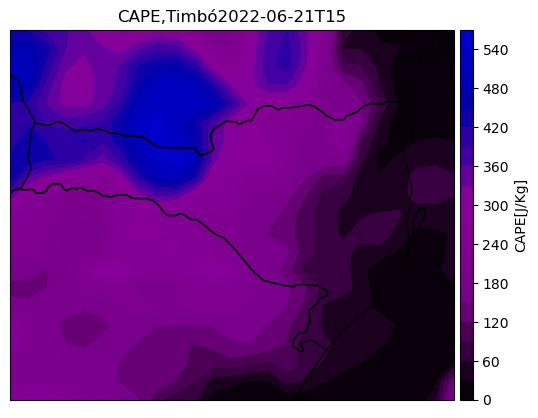

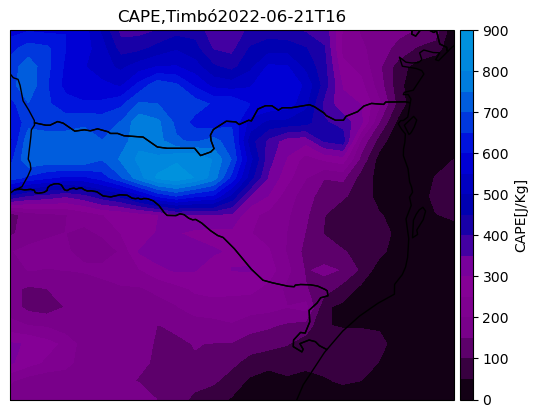

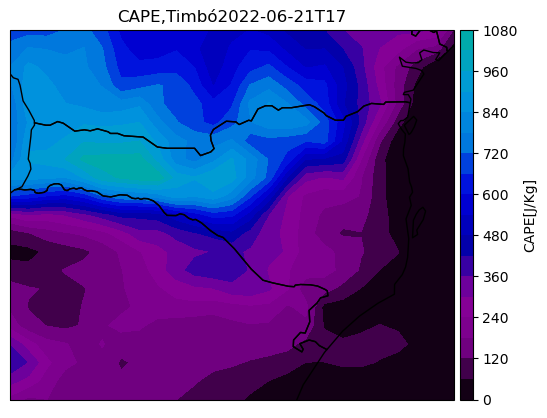

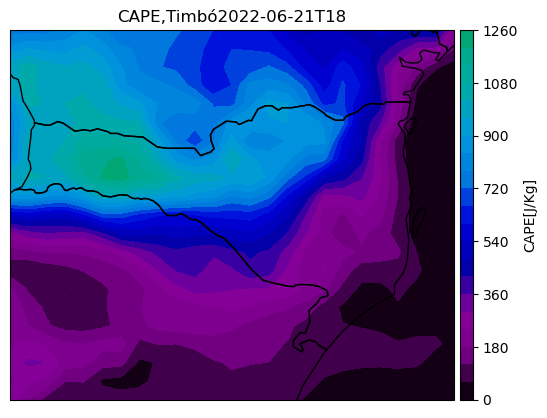

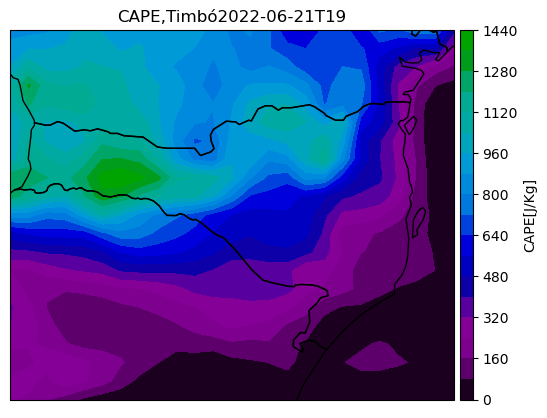

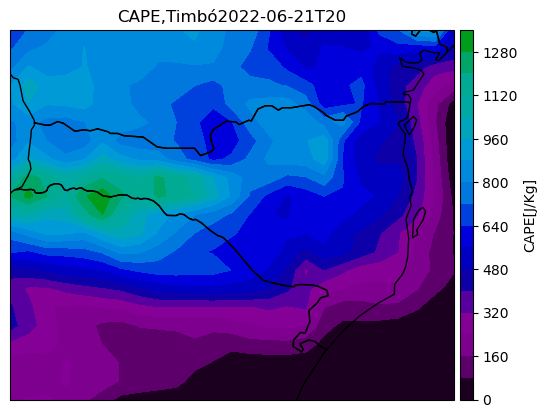

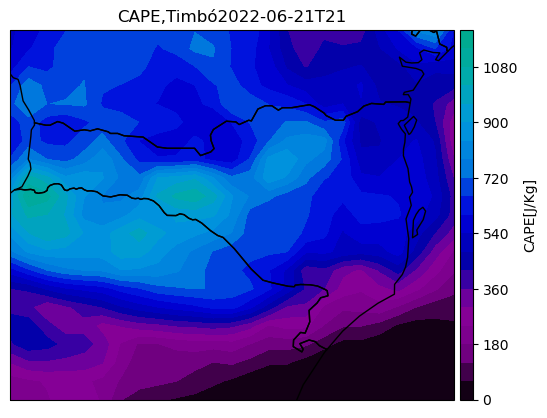

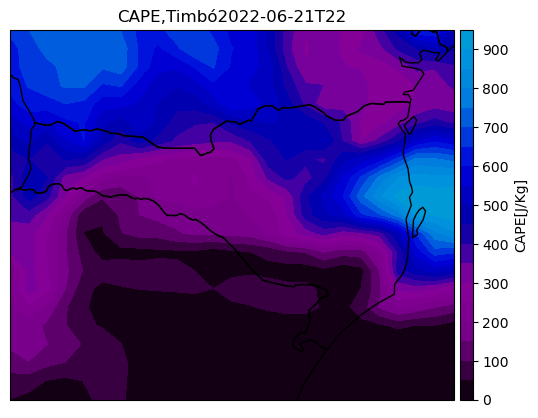

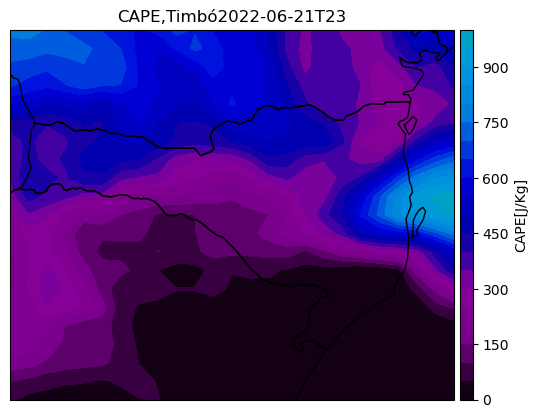

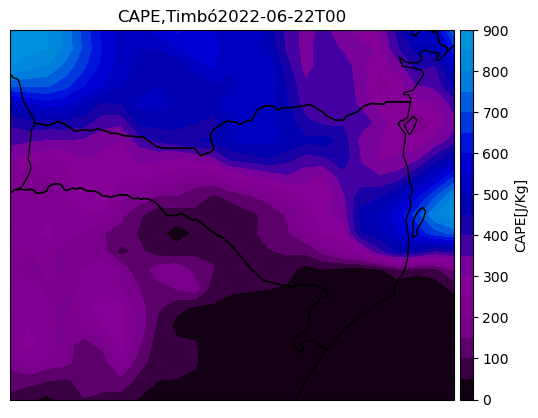

In [32]:
# Setup the figure
d = n-6
while d < n+4:
    cape = t_data.cape[d,:]
    hora = t_data.time[d].values
    hora = str(hora)
    hora = hora[0:13]
    
    fig = plt.figure()
    ax = plt.subplot(projection=ccrs.PlateCarree())
    plt.title(f"CAPE,{local}{hora}")

    tplot = ax.contourf(lon, lat, cape, cmap='nipy_spectral', levels=20, vmin=0, vmax=3000 )

    posn = ax.get_position()
    cbar_ax = fig.add_axes([posn.x0 + posn.width + 0.01, posn.y0, 0.02, posn.height])

    plt.colorbar(tplot, cax=cbar_ax, label='CAPE[J/Kg]')

    ax.add_feature(cfeature.STATES.with_scale('50m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\cape{d}.png', bbox_inches='tight')
    d+=1 
